<a href="https://colab.research.google.com/github/SiddhiPatil23/Restaurant_Review_Sentiment_Analysis/blob/main/Siddhi_Restaurant_Review__Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter='\t',quoting=3)


In [ ]:
data.head(10)


,Review,Liked,tokenized_Review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices
5,Now I am getting angry and I want my damn pho.,0,getting angry want damn pho
6,Honeslty it didn't taste THAT fresh.),0,Honeslty didnt taste fresh
7,The potatoes were like rubber and you could te...,0,potatoes like rubber could tell made ahead tim...
8,The fries were great too.,1,fries great
9,A great touch.,1,great touch


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data['tokenized_Review'] = data['Review'].apply(text_process)

In [ ]:
data.head()

,Review,Liked,tokenized_Review
0,Wow... Loved this place.,1,Wow Loved place
1,Crust is not good.,0,Crust good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,selection menu great prices


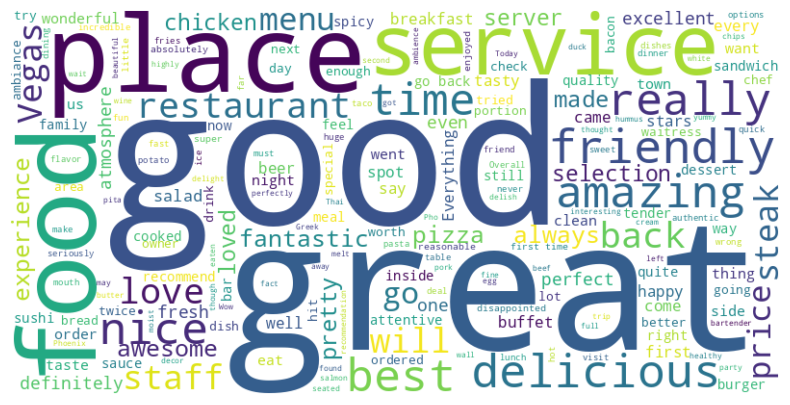

In [ ]:
#import library
#positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
#Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

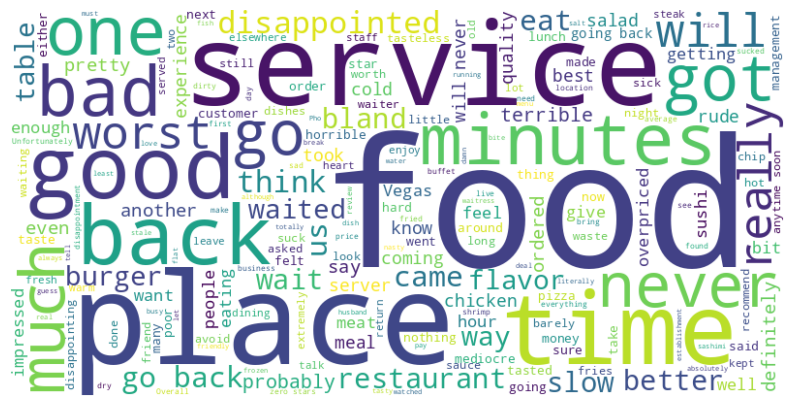

In [ ]:
#import library
#negative review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = data.loc[data['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])
#Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(data['tokenized_Review']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['tokenized_Review'],data['Liked'],random_state=107,test_size=0.2)

In [ ]:
X_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [ ]:
X_train_array = train_vectorized.toarray()
X_test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_array, y_train)

GaussianNB()

In [ ]:
y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report


In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual,predicted)))
  print('precision_score is {}'.format(precision_score(actual,predicted)))
  print('recall_score is {}'.format(recall_score(actual,predicted)))
  print('f1_score is {}'.format(f1_score(actual,predicted)))
  print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('classification_report is {}'.format(classification_report(actual,predicted)))

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_nb)

accuracy_score is 0.76375
precision_score is 0.8403908794788274
recall_score is 0.6482412060301508
f1_score is 0.7319148936170213
roc_auc_score is 0.7631753293832346
confusion_matrix is [[353  49]
 [140 258]]
classification_report is               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_nb)

accuracy_score is 0.725
precision_score is 0.8133333333333334
recall_score is 0.5980392156862745
f1_score is 0.6892655367231638
roc_auc_score is 0.7275910364145659
confusion_matrix is [[84 14]
 [41 61]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnv=MultinomialNB()
mnv.fit(X_train_array, y_train)

MultinomialNB()

In [ ]:
y_train_preds_mnv = mnv.predict(X_train_array)
y_test_preds_mnv = mnv.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_mnv)

accuracy_score is 0.77
precision_score is 0.8092485549132948
recall_score is 0.7035175879396985
f1_score is 0.7526881720430108
roc_auc_score is 0.7696692417310432
confusion_matrix is [[336  66]
 [118 280]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_mnv)

accuracy_score is 0.745
precision_score is 0.7802197802197802
recall_score is 0.696078431372549
f1_score is 0.7357512953367875
roc_auc_score is 0.7459983993597439
confusion_matrix is [[78 20]
 [31 71]]
classification_report is               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5)
rf.fit(X_train_array, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [ ]:
y_train_preds_rf = rf.predict(X_train_array)
y_test_preds_rf = rf.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_rf)

accuracy_score is 0.74625
precision_score is 0.925764192139738
recall_score is 0.5326633165829145
f1_score is 0.6762360446570973
roc_auc_score is 0.745187379684492
confusion_matrix is [[385  17]
 [186 212]]
classification_report is               precision    recall  f1-score   support

           0       0.67      0.96      0.79       402
           1       0.93      0.53      0.68       398

    accuracy                           0.75       800
   macro avg       0.80      0.75      0.73       800
weighted avg       0.80      0.75      0.73       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_rf)

accuracy_score is 0.71
precision_score is 0.8548387096774194
recall_score is 0.5196078431372549
f1_score is 0.6463414634146342
roc_auc_score is 0.7138855542216886
confusion_matrix is [[89  9]
 [49 53]]
classification_report is               precision    recall  f1-score   support

           0       0.64      0.91      0.75        98
           1       0.85      0.52      0.65       102

    accuracy                           0.71       200
   macro avg       0.75      0.71      0.70       200
weighted avg       0.75      0.71      0.70       200



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_array, y_train)


LogisticRegression()

In [ ]:
y_train_preds_lr = lr.predict(X_train_array)
y_test_preds_lr = lr.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_lr)

accuracy_score is 0.7875
precision_score is 0.85625
recall_score is 0.6884422110552764
f1_score is 0.7632311977715877
roc_auc_score is 0.7870071751793793
confusion_matrix is [[356  46]
 [124 274]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.89      0.81       402
           1       0.86      0.69      0.76       398

    accuracy                           0.79       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.79      0.79       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_lr)

accuracy_score is 0.775
precision_score is 0.8064516129032258
recall_score is 0.7352941176470589
f1_score is 0.7692307692307693
roc_auc_score is 0.7758103241296519
confusion_matrix is [[80 18]
 [27 75]]
classification_report is               precision    recall  f1-score   support

           0       0.75      0.82      0.78        98
           1       0.81      0.74      0.77       102

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.77       200



In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_array, y_train)

SVC(kernel='linear')

In [ ]:
y_train_preds_svc = svc.predict(X_train_array)
y_test_preds_svc = svc.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_svc)

accuracy_score is 0.77875
precision_score is 0.8850174216027874
recall_score is 0.6381909547738693
f1_score is 0.7416058394160583
roc_auc_score is 0.7780507012675316
confusion_matrix is [[369  33]
 [144 254]]
classification_report is               precision    recall  f1-score   support

           0       0.72      0.92      0.81       402
           1       0.89      0.64      0.74       398

    accuracy                           0.78       800
   macro avg       0.80      0.78      0.77       800
weighted avg       0.80      0.78      0.77       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_svc)

accuracy_score is 0.735
precision_score is 0.8181818181818182
recall_score is 0.6176470588235294
f1_score is 0.7039106145251396
roc_auc_score is 0.7373949579831933
confusion_matrix is [[84 14]
 [39 63]]
classification_report is               precision    recall  f1-score   support

           0       0.68      0.86      0.76        98
           1       0.82      0.62      0.70       102

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200



In [ ]:
from sklearn import tree
# Create a Decision Tree classifier
dtc = tree.DecisionTreeClassifier(max_depth=3)
# Train the Decision Tree classifier on your training data
dtc.fit(X_train_array, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
y_train_preds_dtc = dtc.predict(X_train_array)
y_test_preds_dtc = dtc.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_dtc)

accuracy_score is 0.63625
precision_score is 0.9022556390977443
recall_score is 0.3015075376884422
f1_score is 0.4519774011299435
roc_auc_score is 0.6345846146153653
confusion_matrix is [[389  13]
 [278 120]]
classification_report is               precision    recall  f1-score   support

           0       0.58      0.97      0.73       402
           1       0.90      0.30      0.45       398

    accuracy                           0.64       800
   macro avg       0.74      0.63      0.59       800
weighted avg       0.74      0.64      0.59       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_dtc)

accuracy_score is 0.615
precision_score is 0.8378378378378378
recall_score is 0.30392156862745096
f1_score is 0.4460431654676259
roc_auc_score is 0.6213485394157664
confusion_matrix is [[92  6]
 [71 31]]
classification_report is               precision    recall  f1-score   support

           0       0.56      0.94      0.70        98
           1       0.84      0.30      0.45       102

    accuracy                           0.61       200
   macro avg       0.70      0.62      0.58       200
weighted avg       0.70      0.61      0.57       200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier # For classification
knn = KNeighborsClassifier(n_neighbors=5)
# Train the KNeighbor classifier on your training data
knn.fit(X_train_array, y_train)


KNeighborsClassifier()

In [ ]:
y_train_preds_knn = knn.predict(X_train_array)
y_test_preds_knn = knn.predict(X_test_array)

In [ ]:
#Evaluation of training model
print_metrics(y_train, y_train_preds_knn)

accuracy_score is 0.7725
precision_score is 0.8157894736842105
recall_score is 0.7010050251256281
f1_score is 0.754054054054054
roc_auc_score is 0.7721443036075902
confusion_matrix is [[339  63]
 [119 279]]
classification_report is               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.82      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



In [ ]:
#Evaluation of testing model
print_metrics(y_test, y_test_preds_knn)

accuracy_score is 0.675
precision_score is 0.7126436781609196
recall_score is 0.6078431372549019
f1_score is 0.6560846560846562
roc_auc_score is 0.6763705482192878
confusion_matrix is [[73 25]
 [40 62]]
classification_report is               precision    recall  f1-score   support

           0       0.65      0.74      0.69        98
           1       0.71      0.61      0.66       102

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.68      0.68      0.67       200

